In [40]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import nltk
import re
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import STOPWORDS
import numpy as np
import warnings
import seaborn as sns
from gensim.models import FastText
warnings.filterwarnings('ignore')

In [8]:
tiktok = pd.read_csv("D:\\Datasets\\tiktok_dataset.csv")

In [9]:
tiktok.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [10]:
tiktok.dropna(axis = 0, inplace = True)

In [11]:
tiktok.rename(columns={'video_transcription_text' : 'text'},inplace=True)

In [12]:
tiktok.head()

,#,claim_status,video_id,video_duration_sec,text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


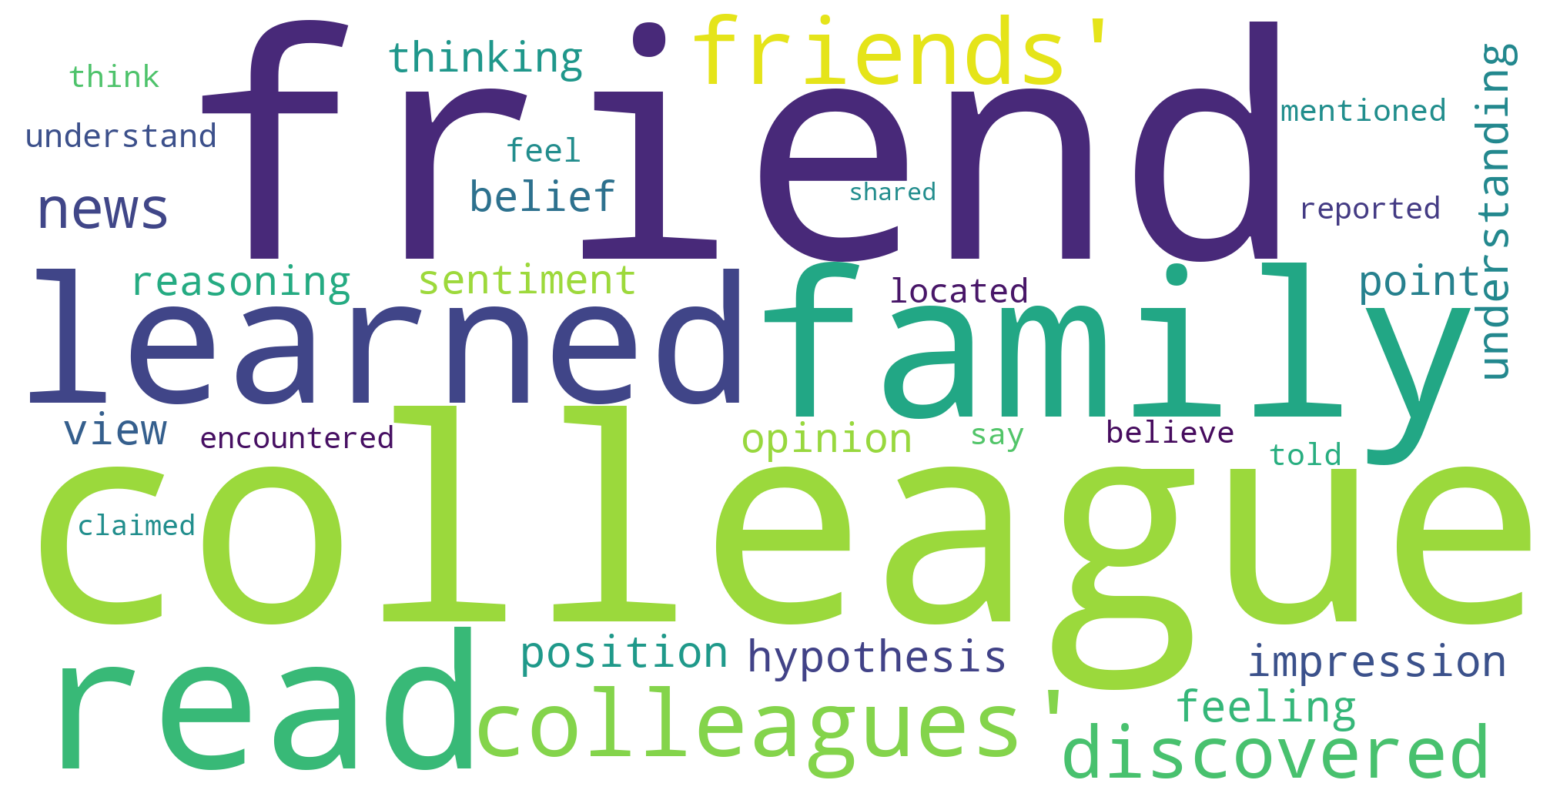

In [13]:
plt.figure(figsize=(20,10))
#Creating the text variable
textWordCloudBefore = " ".join(cat.split()[1] for cat in tiktok.text)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white', width=2000, height=1000).generate(textWordCloudBefore)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

"""
1. `plt.figure(figsize=(20,10))`: This line creates a new figure with a specific size of 20x10 inches for the plot. This ensures that the output word cloud will be displayed in a large enough format.

2. `textWordCloudBefore = " ".join(cat.split()[1] for cat in tiktok.text)`: This line extracts the text data from the `tiktok` dataset and creates a string `textWordCloudBefore` by joining all the words together. It uses a generator expression to split each entry in the `tiktok.text` and selects the second part (index 1) to avoid any non-textual metadata or identifiers that might be present in the data.

3. `word_cloud = WordCloud(collocations=False, background_color='white', width=2000, height=1000).generate(textWordCloudBefore)`: This line creates the word cloud object `word_cloud` using the `WordCloud` class from the `wordcloud` library. It specifies parameters such as `collocations=False` to disable combining words that frequently appear together, `background_color='white'` to set the background color of the word cloud to white, and `width=2000` and `height=1000` to set the dimensions of the word cloud image.

4. `plt.imshow(word_cloud, interpolation='bilinear')`: This line displays the word cloud using `imshow` function from `matplotlib.pyplot`. It takes `word_cloud` as input and uses bilinear interpolation for smoother display of the word cloud.

5. `plt.axis("off")`: This line turns off the axis of the plot, ensuring that only the word cloud is displayed without any axes or ticks.

6. `plt.show()`: This line displays the plot containing the word cloud.

Output:
The output will be a visualization of a word cloud, where the size of each word corresponds to its frequency in the text data from the TikTok dataset. Commonly occurring words will appear larger and more prominent in the visualization. The background of the word cloud will be white, and there will be no axis visible around the word cloud image.

"""

In [14]:
string.punctuation

processed_text_Data = tiktok.copy()
processed_text_Data.reset_index(drop=True, inplace=True)

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    punctuationfree="".join([i for i in punctuationfree if i not in ['\n', '\t', '\b']])
    return punctuationfree

#storing the puntuation free text
processed_text_Data['text_punct_remove']= tiktok['text'].apply(lambda x:remove_punctuation(x))
processed_text_Data['text_punct_remove']


"""
1. `string.punctuation`: This is a string constant defined in the `string` module that contains all the punctuation characters (`!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~`).

2. `processed_text_Data = tiktok.copy()`: This line creates a copy of the original TikTok dataset named `processed_text_Data`. This is done to preserve the original dataset and perform operations on the copy.

3. `processed_text_Data.reset_index(drop=True, inplace=True)`: This line resets the index of the `processed_text_Data` DataFrame, dropping the existing index and replacing it with a new one. The `drop=True` parameter ensures that the old index is dropped, and `inplace=True` modifies the DataFrame in place.

4. `def remove_punctuation(text):`: This line defines a function `remove_punctuation` that takes a text input and removes punctuation characters from it.

5. `punctuationfree="".join([i for i in text if i not in string.punctuation])`: This line creates a new string `punctuationfree` by joining all characters from the input text except those that are present in the `string.punctuation` string.

6. `punctuationfree="".join([i for i in punctuationfree if i not in ['\n', '\t', '\b']])`: This line further removes newline (`\n`), tab (`\t`), and backspace (`\b`) characters from the `punctuationfree` string.

7. `return punctuationfree`: This line returns the modified text without punctuation.

8. `processed_text_Data['text_punct_remove']= tiktok['text'].apply(lambda x:remove_punctuation(x))`: This line creates a new column `text_punct_remove` in the `processed_text_Data` DataFrame by applying the `remove_punctuation` function to each element in the `text` column of the original TikTok dataset (`tiktok['text']`).

9. `processed_text_Data['text_punct_remove']`: This line displays the contents of the `text_punct_remove` column, which contains the text data from the original TikTok dataset with punctuation removed.

Output:
The output will be a Pandas Series containing the text data from the TikTok dataset with punctuation removed. Each element of the series will be a string without any punctuation characters, newline characters, tab characters, or backspace characters. This processed text data is stored in the `text_punct_remove` column of the `processed_text_Data` DataFrame.

"""

0        someone shared with me that drone deliveries a...
1        someone shared with me that there are more mic...
2        someone shared with me that american industria...
3        someone shared with me that the metro of st pe...
4        someone shared with me that the number of busi...
                               ...                        
19079    in our opinion the earth holds about 11 quinti...
19080    in our opinion the queens in ant colonies live...
19081    in our opinion the moon is moving away from th...
19082    in our opinion lightning strikes somewhere on ...
19083    in our opinion a pineapple plant can only prod...
Name: text_punct_remove, Length: 19084, dtype: object

In [15]:
processed_text_Data['text_lower']= processed_text_Data['text_punct_remove'].apply(lambda x: x.lower())

In [16]:
import langdetect

languages_langdetect = []

# the try except blook because there is some tweets contain links
for line in processed_text_Data['text_lower']:
    try:
        result = langdetect.detect_langs(line)
        result = str(result[0])[:2]
    except:
        result = 'unknown'
    
    finally:
        languages_langdetect.append(result)

processed_text_Data['languages']=languages_langdetect

processed_text_Data['languages'].unique()

array(['en'], dtype=object)

In [17]:
for l in processed_text_Data['languages'].unique():
    if l != 'en':
        print(processed_text_Data[(processed_text_Data['languages']==l)].text)

In [18]:
for l in processed_text_Data['languages'].unique():
        if l != 'en':
                processed_text_Data.drop(processed_text_Data[(processed_text_Data['languages']==l)].index, axis=0, inplace=True)

processed_text_Data.reset_index(inplace=True)

In [19]:
def cleaningText(text):
    sentences = nltk.sent_tokenize(text)
    review = ""
    for i in range(len(sentences)):
        review = re.sub('[^a-zA-Z]', ' ', sentences[i])
        review = review.split()
        review = [word for word in review if not word.lower() in set(stopwords.words('english'))]
        review = [word for word in review if not word.lower() in set(STOPWORDS)]
        for x in review:
            if x.lower() == 'i':
                print(x)
        review = ' '.join(review)
    return review

processed_text_Data['cleanText'] = processed_text_Data['text_lower'].apply(lambda x : cleaningText(x))
processed_text_Data['cleanText']

"""
1. `def cleaningText(text):`: This line defines a function named `cleaningText` which takes a text input as its argument.

2. `sentences = nltk.sent_tokenize(text)`: This line tokenizes the input text into sentences using the `sent_tokenize` function from the `nltk` (Natural Language Toolkit) library.

3. `review = ""`**: This initializes an empty string `review` which will store the cleaned text.

4. `for i in range(len(sentences)):`**: This initiates a loop over the sentences in the input text.

5. `review = re.sub('[^a-zA-Z]', ' ', sentences[i])`**: This line removes any non-alphabetic characters from the current sentence using regular expression substitution. It replaces non-alphabetic characters with a space.

6. `review = review.split()`**: This line splits the cleaned sentence into words.

7. `review = [word for word in review if not word.lower() in set(stopwords.words('english'))]`**: This line removes stopwords from the sentence. Stopwords are common words (such as "the", "is", "in", etc.) that often do not carry significant meaning in text analysis. It uses the `stopwords` list from the `nltk` library.

8. `review = [word for word in review if not word.lower() in set(STOPWORDS)]`**: This line removes additional stopwords. It seems to use another set of stopwords defined elsewhere in the code named `STOPWORDS`.

9. `for x in review:`** and **`if x.lower() == 'i': print(x)`**: These lines check if the word 'i' is present in the cleaned review and prints it. However, this print statement seems to be for debugging purposes and might not be relevant to the final output.

10. `review = ' '.join(review)`**: This line joins the cleaned words back into a single string, separated by spaces.

11. `return review`**: This returns the cleaned review.

12. `processed_text_Data['cleanText'] = processed_text_Data['text_lower'].apply(lambda x : cleaningText(x))`**: This line applies the `cleaningText` function to each element in the `text_lower` column of the `processed_text_Data` DataFrame and stores the cleaned text in a new column named `cleanText`.

13. `processed_text_Data['cleanText']`**: This line displays the contents of the `cleanText` column, which contains the cleaned text data.

Output:
The output will be a series of cleaned texts, where non-alphabetic characters and stopwords have been removed from each sentence of the input text. Additionally, the text has been converted to lowercase. The output is stored in the `cleanText` column of the `processed_text_Data` DataFrame.

"""

0                 shared drone deliveries happening common
1        shared microorganisms teaspoon soil people planet
2        shared american industrialist andrew carnegie ...
3        shared metro st petersburg average depth meter...
4        shared number businesses allowing employees br...
                               ...                        
19079           opinion earth holds quintillion pounds air
19080               opinion queens ant colonies live years
19081                       opinion moon moving away earth
19082         opinion lightning strikes earth times second
19083       opinion pineapple plant produce pineapple year
Name: cleanText, Length: 19084, dtype: object

In [20]:
import spacy
from spacy.lang.en import stop_words as spacy_stopwords


stop_words = spacy_stopwords.STOP_WORDS
nlp = spacy.load('en_core_web_lg')
extraStopwords = ['ve', 'll', 'm', 's', 'd', 'ny', 'st', 'woo', 'n', 'ish']
neutralTags = ['NN', 'NNP', 'NNS', 'NNPS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'PRP', 'WP', 'RB', 'RBR', 'RBS', 'IN', 'DT', 'CC']
initialTags = ['ADV', 'NOUN', 'VERB', 'PROPN', 'PRON', 'AUX', 'CCONJ', 'PART', 'SYM', 'SPACE', 'PUNCT', 'DET', 'CONJ', 'X']


# lemmatization
processed_text_Data['text_lemmatized']=processed_text_Data['cleanText'].apply(lambda x:[token.lemma_ for token in nlp(x) if token.pos_ not in initialTags])

# rechecking for the stopwords
processed_text_Data['text_lemmatized'] = processed_text_Data['text_lemmatized'].apply(lambda p:[x for x in p if str(x.lower()) not in set(STOPWORDS) and str(x.lower()) not in stop_words and str(x.lower()) not in extraStopwords])

# rechecking the neutral words
processed_text_Data['text_lemmatized'] = processed_text_Data['text_lemmatized'].apply(lambda t: [token for token in t if nltk.pos_tag([token])[0][1] not in neutralTags])


processed_text_Data['text_lemmatized']

"""
1. **Importing libraries and resources**:
   - `import spacy`: Imports the spaCy library for natural language processing.
   - `from spacy.lang.en import stop_words as spacy_stopwords`: Imports stop words from the spaCy library for English language.
   
2. **Defining variables**:
   - `stop_words = spacy_stopwords.STOP_WORDS`: Retrieves the set of stop words provided by spaCy.
   - `nlp = spacy.load('en_core_web_lg')`: Loads the spaCy English language model for further text processing.
   - `extraStopwords = ['ve', 'll', 'm', 's', 'd', 'ny', 'st', 'woo', 'n', 'ish']`: Defines additional stopwords to be removed from the text.
   - `neutralTags`, `initialTags`: Define lists of part-of-speech (POS) tags used later for filtering out neutral and initial words respectively.

3. **Lemmatization**:
   - `processed_text_Data['text_lemmatized']=processed_text_Data['cleanText'].apply(lambda x:[token.lemma_ for token in nlp(x) if token.pos_ not in initialTags])`: Lemmatizes the cleaned text (`cleanText`) by applying spaCy's lemmatization function to each token in each sentence. Tokens are only included if their POS tag is not in the `initialTags` list.

4. **Removing stopwords**:
   - `processed_text_Data['text_lemmatized'] = processed_text_Data['text_lemmatized'].apply(lambda p:[x for x in p if str(x.lower()) not in set(STOPWORDS) and str(x.lower()) not in stop_words and str(x.lower()) not in extraStopwords])`: Removes stopwords from the lemmatized text. It filters out tokens that are found in either the spaCy's stop words list (`stop_words`), a custom list of extra stopwords (`extraStopwords`), or NLTK's stop words (`STOPWORDS`).

5. **Filtering neutral words**:
   - `processed_text_Data['text_lemmatized'] = processed_text_Data['text_lemmatized'].apply(lambda t: [token for token in t if nltk.pos_tag([token])[0][1] not in neutralTags])`: Removes neutral words by filtering out tokens whose POS tags are found in the `neutralTags` list. It uses NLTK's `pos_tag` function to determine the POS tag of each token.

6. **Output**:
   - `processed_text_Data['text_lemmatized']`: Displays the resulting lemmatized, stopwords-removed, and neutral words-filtered text data.

**Output:**
The output will be a series containing the preprocessed text data after lemmatization, removal of stopwords, and filtering out neutral words. Each element of the series represents a list of lemmatized tokens that have passed through the preprocessing steps described above. This series is stored in the `text_lemmatized` column of the `processed_text_Data` DataFrame.

"""

0                  [common]
1                        []
2        [million, billion]
3                 [average]
4                        []
                ...        
19079                    []
19080                    []
19081                    []
19082                    []
19083                    []
Name: text_lemmatized, Length: 19084, dtype: object

In [21]:
initialTagsLDA = ['ADV', 'PRON', 'AUX', 'CCONJ', 'PART', 'SYM', 'SPACE', 'PUNCT', 'DET', 'CONJ', 'X', 'ADJ']
processed_text_Data['token_lda']=processed_text_Data['cleanText'].apply(lambda x:[token.lemma_ for token in nlp(x) if token.pos_ not in initialTagsLDA])

# rechecking for the stopwords
processed_text_Data['token_lda'] = processed_text_Data['token_lda'].apply(lambda p:[x for x in p if str(x.lower()) not in set(STOPWORDS) and str(x.lower()) not in stop_words and str(x.lower()) not in extraStopwords])

processed_text_Data['token_lda']


"""
This code performs text preprocessing similar to the previous one, but it is tailored for the purpose of topic modeling using LDA (Latent Dirichlet Allocation). Let's break down each part of the code and understand its functionality:

1. **Defining variables**:
   - `initialTagsLDA`: Defines a list of part-of-speech (POS) tags to be excluded from the text tokens during preprocessing. These tags are considered less informative or irrelevant for topic modeling using LDA.

2. **Tokenization and Lemmatization**:
   - `processed_text_Data['token_lda'] = processed_text_Data['cleanText'].apply(lambda x:[token.lemma_ for token in nlp(x) if token.pos_ not in initialTagsLDA])`: Tokenizes and lemmatizes the cleaned text (`cleanText`) by applying spaCy's lemmatization function to each token in each sentence. Tokens are only included if their POS tag is not in the `initialTagsLDA` list.

3. **Removing stopwords**:
   - `processed_text_Data['token_lda'] = processed_text_Data['token_lda'].apply(lambda p:[x for x in p if str(x.lower()) not in set(STOPWORDS) and str(x.lower()) not in stop_words and str(x.lower()) not in extraStopwords])`: Removes stopwords from the lemmatized tokens. It filters out tokens that are found in either the spaCy's stop words list (`stop_words`), a custom list of extra stopwords (`extraStopwords`), or NLTK's stop words (`STOPWORDS`).

4. **Output**:
   - `processed_text_Data['token_lda']`: Displays the resulting preprocessed tokens after lemmatization and removal of stopwords. Each element of the series represents a list of tokens that have passed through the preprocessing steps described above.

**Output**:
The output will be a series containing the preprocessed tokens specifically tailored for topic modeling using LDA. Each element of the series represents a list of tokens that have undergone lemmatization and removal of stopwords and less informative POS tags. This series is stored in the `token_lda` column of the `processed_text_Data` DataFrame. These preprocessed tokens are then used as input for the LDA topic modeling algorithm to identify latent topics in the text data.

"""

0                         [share, drone, delivery, happen]
1        [share, microorganism, teaspoon, soil, people,...
2        [share, american, industrialist, andrew, carne...
3        [share, metro, petersburg, depth, meter, metro...
4        [share, number, business, allow, employee, bri...
                               ...                        
19079                   [opinion, earth, hold, pound, air]
19080            [opinion, queen, ant, colony, live, year]
19081                               [opinion, moon, earth]
19082            [opinion, lightning, strike, earth, time]
19083    [opinion, pineapple, plant, produce, pineapple...
Name: token_lda, Length: 19084, dtype: object

In [22]:
from collections import Counter

def get_all_lemmas(data):
    all_lemmas = []
    for tokens in data:
        all_lemmas.extend(tokens)
    return all_lemmas

all_lemmas = get_all_lemmas(processed_text_Data.text_lemmatized)

# Count
lemmas_freq = Counter(all_lemmas)
common_lemmas = lemmas_freq.most_common(100)
print (common_lemmas, len(common_lemmas))

"""
This code snippet is designed to extract and count the frequency of lemmas (base forms of words) from a preprocessed text dataset. Let's break down each part of the code and understand its functionality:

1. **Defining a function to get all lemmas**:
   - `def get_all_lemmas(data):`: This line defines a function named `get_all_lemmas` that takes a list of lists of tokens (`data`) as input.
   - `all_lemmas = []`: Initializes an empty list to store all the lemmas extracted from the tokens.
   - `for tokens in data:`: Iterates over each list of tokens in the input data.
   - `all_lemmas.extend(tokens)`: Extends the `all_lemmas` list with the tokens from the current list. This effectively flattens the list of lists into a single list of tokens.
   - `return all_lemmas`: Returns the list containing all the lemmas extracted from the input data.

2. **Extracting all lemmas**:
   - `all_lemmas = get_all_lemmas(processed_text_Data.text_lemmatized)`: Calls the `get_all_lemmas` function with the preprocessed text lemmatized data (`processed_text_Data.text_lemmatized`). This extracts all lemmas from the preprocessed text data and stores them in the `all_lemmas` list.

3. **Counting lemma frequencies**:
   - `lemmas_freq = Counter(all_lemmas)`: Uses the `Counter` class from the `collections` module to count the frequency of each lemma in the `all_lemmas` list. This creates a dictionary-like object where keys are lemmas and values are their frequencies.

4. **Extracting common lemmas**:
   - `common_lemmas = lemmas_freq.most_common(100)`: Retrieves the 100 most common lemmas and their frequencies from the `lemmas_freq` Counter object using the `most_common()` method. These common lemmas are stored in the `common_lemmas` list.

5. **Printing the results**:
   - `print(common_lemmas, len(common_lemmas))`: Prints the list of 100 most common lemmas along with their frequencies (`common_lemmas`) and the total number of unique common lemmas (`len(common_lemmas)`).

**Output Explanation**:
The output of this code will be a list of tuples, each containing a lemma and its frequency. These tuples represent the most common lemmas in the preprocessed text data. Additionally, it prints the total number of unique common lemmas. This information provides insights into the most frequently occurring words in the text data after preprocessing, which can be valuable for understanding the main topics or themes present in the dataset.

"""

[('willing', 1008), ('social', 712), ('average', 613), ('large', 563), ('single', 385), ('million', 368), ('old', 334), ('good', 321), ('new', 307), ('billion', 253), ('high', 247), ('total', 226), ('musical', 202), ('different', 198), ('common', 140), ('playable', 136), ('individual', 133), ('big', 126), ('small', 124), ('hot', 124), ('equal', 122), ('french', 119), ('commercial', 114), ('wide', 109), ('green', 94), ('artificial', 93), ('modern', 92), ('american', 89), ('gross', 78), ('domestic', 78), ('financial', 78), ('overall', 78), ('japanese', 73), ('illegal', 71), ('scary', 69), ('impossible', 67), ('white', 66), ('natural', 66), ('seven', 65), ('productive', 65), ('british', 64), ('professional', 64), ('scottish', 63), ('powerful', 62), ('electric', 62), ('real', 61), ('automotive', 61), ('venomous', 61), ('second', 58), ('emotional', 58), ('facial', 58), ('scrabble', 57), ('busy', 57), ('international', 56), ('internal', 55), ('possible', 55), ('active', 55), ('black', 55), (

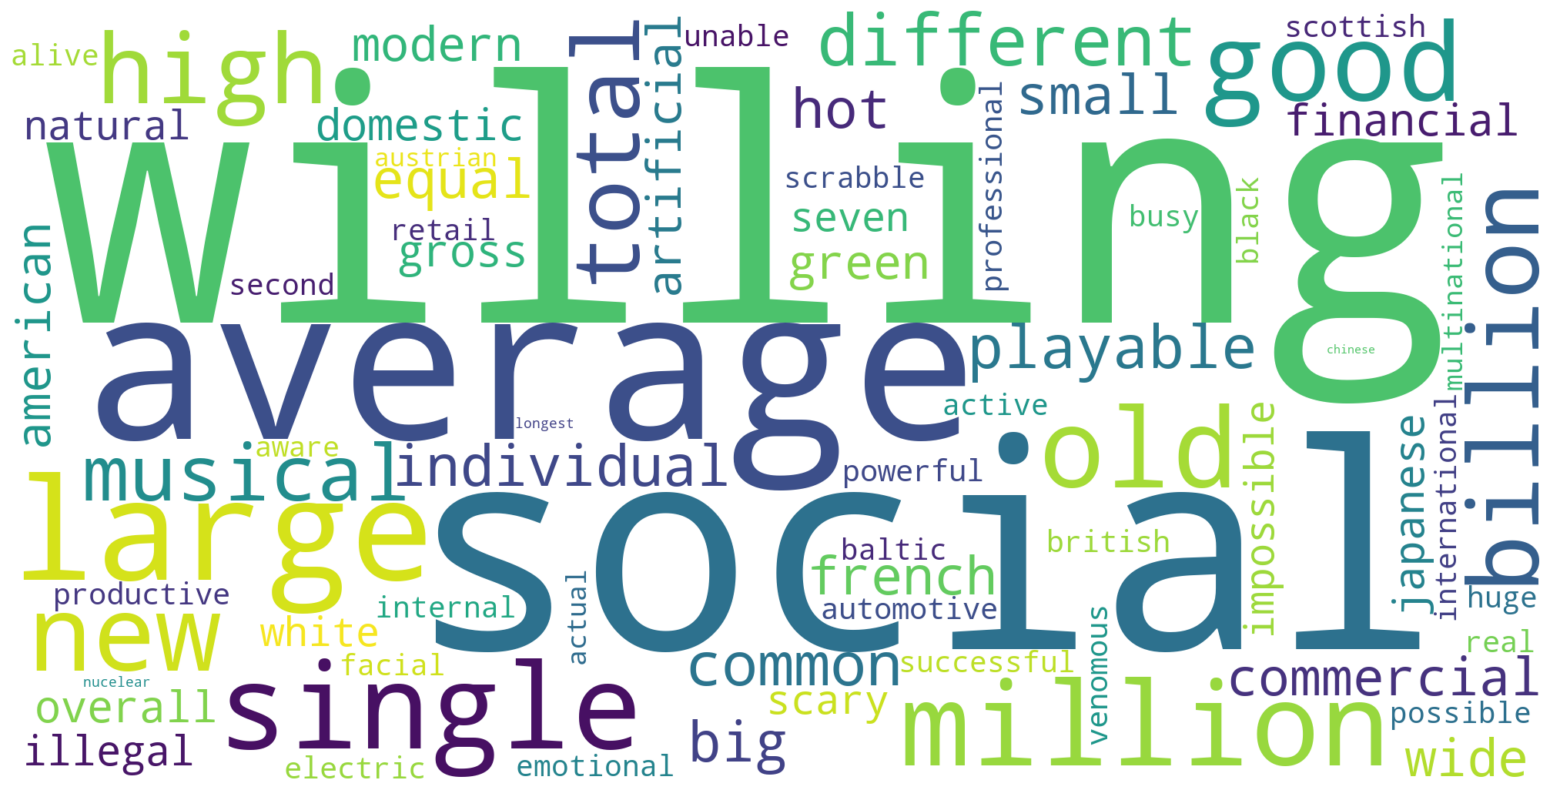

In [23]:
plt.figure(figsize=(20,10))
#Creating the text variable
textWordCloudAfter = " ".join(cat for cat in processed_text_Data['text_lemmatized'].apply(lambda review: ' '.join(review)))
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white', width=2000, height=1000).generate(textWordCloudAfter)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
model_ted = FastText(processed_text_Data['text_lemmatized'], vector_size=500, window=3, min_count=3, workers=4,sg=1)

wordFastText = pd.concat([pd.DataFrame(model_ted.wv.index_to_key, columns=['words']), pd.DataFrame(model_ted.wv.vectors)], axis=1)

wordFastText


"""
This code snippet is using the FastText model from the Gensim library to generate word embeddings for the lemmatized text data. Let's break down each part of the code and understand its functionality:

1. **Training the FastText model**:
   - `model_ted = FastText(processed_text_Data['text_lemmatized'], vector_size=500, window=3, min_count=3, workers=4, sg=1)`: This line initializes and trains a FastText model using the `FastText` class from Gensim. It takes the lemmatized text data (`processed_text_Data['text_lemmatized']`) as input.
     - `vector_size=500`: Specifies the dimensionality of the word vectors to be 500.
     - `window=3`: Sets the maximum distance between the current and predicted word within a sentence to 3 words.
     - `min_count=3`: Specifies that words with a frequency less than 3 should be ignored.
     - `workers=4`: Sets the number of worker threads to train the model in parallel.
     - `sg=1`: Sets the training algorithm to Skip-gram.

2. **Generating word embeddings**:
   - `wordFastText = pd.concat([pd.DataFrame(model_ted.wv.index_to_key, columns=['words']), pd.DataFrame(model_ted.wv.vectors)], axis=1)`: This line concatenates two dataframes to create a dataframe containing the words and their corresponding word vectors (embeddings).
     - `model_ted.wv.index_to_key`: Accesses the vocabulary of the trained FastText model to get the words.
     - `model_ted.wv.vectors`: Accesses the word vectors (embeddings) learned by the FastText model.
     - `pd.DataFrame()`: Converts the vocabulary and word vectors into Pandas dataframes.
     - `pd.concat()`: Concatenates the two dataframes along the columns axis (axis=1) to create a single dataframe `wordFastText`.

3. **Output**:
   - `wordFastText`: This dataframe contains two columns: 'words' and the word vectors. Each row represents a word from the vocabulary along with its corresponding 500-dimensional word vector.

**Output Explanation**:
The output of this code will be a dataframe named `wordFastText` containing word embeddings generated by the FastText model. Each row of the dataframe represents a word from the vocabulary along with its 500-dimensional vector representation. These word embeddings capture semantic and syntactic similarities between words, enabling downstream tasks such as similarity computation, clustering, or classification using these word vectors. This output can be used for various natural language processing tasks, including but not limited to, sentiment analysis, named entity recognition, and document classification.

"""

,words,0,1,2,3,4,5,6,7,8,...,490,491,492,493,494,495,496,497,498,499
0,willing,-0.000194,-0.001326,0.001149,-0.000266,0.000318,-0.001133,0.001633,0.000544,0.002496,...,0.000833,0.000022,0.000065,0.000869,-0.001150,0.000572,-0.003419,0.001271,-0.001792,-0.000565
1,social,-0.000047,-0.002931,0.002202,-0.000749,0.001269,-0.001911,0.003888,0.000957,0.004599,...,0.000894,-0.000334,-0.000712,0.001541,-0.002532,0.001804,-0.006321,0.002511,-0.003310,-0.001390
2,average,0.000150,-0.001207,0.000446,0.000134,-0.000098,-0.000678,0.001776,0.000180,0.001565,...,0.000885,0.000117,-0.000276,0.000908,-0.001330,0.000461,-0.001706,0.000958,-0.001245,-0.000648
3,large,-0.000008,-0.000458,0.000218,0.000325,-0.000019,-0.000470,0.000244,0.000142,0.000393,...,0.000490,0.000359,-0.000146,0.000319,-0.000581,0.000133,-0.000748,0.000439,-0.000202,-0.000452
4,single,-0.000355,-0.001690,0.001058,-0.000294,0.000547,-0.001369,0.001789,0.000476,0.001998,...,0.000945,0.000181,-0.000300,0.000963,-0.000903,0.001505,-0.002587,0.000692,-0.001237,-0.000950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,multinational,-0.000133,-0.001777,0.001520,-0.000461,0.000461,-0.001460,0.002810,0.001243,0.003213,...,0.000871,0.000027,0.000007,0.001397,-0.002234,0.001209,-0.004629,0.001991,-0.002584,-0.000942
66,actual,0.000120,-0.000428,0.000354,-0.000384,0.000266,-0.000639,0.001023,0.000725,0.001131,...,-0.000294,-0.000191,-0.000280,0.000466,-0.000991,0.000201,-0.002022,0.000857,-0.001140,-0.000455
67,austrian,0.000408,-0.000330,-0.000101,-0.000437,0.000172,-0.000404,-0.000175,-0.000019,-0.000365,...,0.000598,0.000501,-0.000185,0.000194,-0.000232,-0.000119,-0.000109,-0.000146,0.000220,0.000456
68,nucelear,0.000457,-0.000084,0.000111,0.000016,0.000060,0.000145,-0.000078,-0.000175,-0.000184,...,-0.000320,-0.000163,-0.000387,0.000266,-0.000461,-0.000030,0.000423,0.000276,0.000145,0.000087


In [26]:
from gensim.models.phrases import Phrases, Phraser, ENGLISH_CONNECTOR_WORDS

def bigram2vec(unigrams):
    bigram = Phraser(Phrases(unigrams, min_count=3, connector_words=ENGLISH_CONNECTOR_WORDS))
    trigram = Phraser(Phrases(bigram[unigrams], min_count=1, connector_words=ENGLISH_CONNECTOR_WORDS))
    return FastText(trigram[bigram[unigrams]], min_count=3,vector_size=500)

resBigram = bigram2vec(processed_text_Data['text_lemmatized'])
FastTextGram = pd.concat([pd.DataFrame(resBigram.wv.index_to_key, columns=['words']), pd.DataFrame(resBigram.wv.vectors)], axis=1)
FastTextGram

"""
This code snippet is designed to create word embeddings using a FastText model trained on text data preprocessed with bigram and trigram phrase modeling. Let's break down each part of the code and understand its functionality:

1. **Importing necessary libraries**:
   - `from gensim.models.phrases import Phrases, Phraser, ENGLISH_CONNECTOR_WORDS`: Imports the Phrases and Phraser classes from the `gensim.models.phrases` module, along with the `ENGLISH_CONNECTOR_WORDS` list of connector words.

2. **Defining the function for bigram to vector conversion**:
   - `def bigram2vec(unigrams):`: Defines a function named `bigram2vec` that takes a list of unigrams (single words) as input.
   - `bigram = Phraser(Phrases(unigrams, min_count=3, connector_words=ENGLISH_CONNECTOR_WORDS))`: Creates a Phraser object for bigram modeling using the Phrases function. It takes the unigrams as input, sets the minimum count of phrases to 3, and specifies the English connector words to be used.
   - `trigram = Phraser(Phrases(bigram[unigrams], min_count=1, connector_words=ENGLISH_CONNECTOR_WORDS))`: Creates a Phraser object for trigram modeling using the Phrases function. It takes the bigram-transformed unigrams as input, sets the minimum count of phrases to 1, and specifies the English connector words to be used.
   - `return FastText(trigram[bigram[unigrams]], min_count=3, vector_size=500)`: Returns a FastText model trained on the trigram-transformed bigram-transformed unigrams. It sets the minimum count of words to 3 and the vector size to 500.

3. **Applying bigram to vector conversion**:
   - `resBigram = bigram2vec(processed_text_Data['text_lemmatized'])`: Applies the `bigram2vec` function to the preprocessed lemmatized text data (`processed_text_Data['text_lemmatized']`). This results in a FastText model (`resBigram`) trained on the text data with bigram and trigram phrase modeling.

4. **Converting FastText model to dataframe**:
   - `FastTextGram = pd.concat([pd.DataFrame(resBigram.wv.index_to_key, columns=['words']), pd.DataFrame(resBigram.wv.vectors)], axis=1)`: Converts the trained FastText model `resBigram` into a dataframe `FastTextGram`. It concatenates the vocabulary (words) and the corresponding word vectors into a single dataframe.

5. **Output**:
   - `FastTextGram`: This dataframe contains two columns: 'words' and the word vectors. Each row represents a word from the vocabulary along with its corresponding 500-dimensional vector representation, which captures semantic and syntactic similarities between words after bigram and trigram phrase modeling.

**Output Explanation**:
The output of this code will be a dataframe named `FastTextGram` containing word embeddings generated by the FastText model trained on text data preprocessed with bigram and trigram phrase modeling. Each row of the dataframe represents a word from the vocabulary along with its 500-dimensional vector representation. These word embeddings capture richer semantic and syntactic information compared to the previous models trained on unigrams only, enabling more nuanced understanding of word relationships in the text data.

"""

,words,0,1,2,3,4,5,6,7,8,...,490,491,492,493,494,495,496,497,498,499
0,willing,-1.539756e-04,-0.000778,0.000790,0.000523,0.000019,-0.000531,0.001087,0.000633,0.001188,...,0.000419,0.000012,0.000526,0.000809,-0.000653,0.000155,-0.002152,0.000614,-0.001656,-0.000417
1,social,-4.018927e-06,-0.001554,0.001202,0.000672,0.000614,-0.000484,0.002260,0.000886,0.001545,...,-0.000050,-0.000345,0.000130,0.001170,-0.001150,0.000792,-0.003055,0.000931,-0.002454,-0.000862
2,average,1.453107e-04,-0.000795,0.000142,0.000671,-0.000309,-0.000225,0.001294,0.000209,0.000565,...,0.000584,0.000110,0.000038,0.000836,-0.000915,0.000122,-0.000720,0.000422,-0.001064,-0.000511
3,large,-8.475675e-07,-0.000290,0.000103,0.000430,-0.000075,-0.000342,0.000017,0.000106,0.000080,...,0.000407,0.000368,-0.000071,0.000246,-0.000419,0.000027,-0.000373,0.000268,-0.000067,-0.000366
4,single,-3.654763e-04,-0.001095,0.000629,0.000351,0.000276,-0.000755,0.001134,0.000468,0.000694,...,0.000538,0.000185,0.000106,0.000848,-0.000327,0.001076,-0.001264,0.000014,-0.000935,-0.000737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,multinational,-1.438664e-04,-0.000844,0.000822,0.000591,0.000012,-0.000471,0.001751,0.001249,0.001094,...,0.000215,-0.000007,0.000613,0.001181,-0.001291,0.000499,-0.002446,0.000914,-0.002027,-0.000594
66,actual,1.280357e-04,-0.000045,0.000082,0.000034,0.000082,-0.000243,0.000584,0.000717,0.000273,...,-0.000556,-0.000196,-0.000034,0.000369,-0.000614,-0.000081,-0.001125,0.000417,-0.000921,-0.000310
67,austrian,4.092119e-04,-0.000320,-0.000110,-0.000426,0.000165,-0.000393,-0.000183,-0.000019,-0.000384,...,0.000591,0.000503,-0.000179,0.000196,-0.000223,-0.000123,-0.000091,-0.000157,0.000225,0.000457
68,nucelear,4.571288e-04,-0.000085,0.000112,0.000016,0.000060,0.000144,-0.000077,-0.000174,-0.000183,...,-0.000320,-0.000163,-0.000387,0.000266,-0.000462,-0.000030,0.000421,0.000276,0.000144,0.000087


In [27]:
from sklearn.decomposition import PCA

# function to verify the variance acquired by the PC
def pcaFunction(data,numberOfComponent):
    pca=PCA(n_components=numberOfComponent)
    pca.fit(data)
    scree = pca.explained_variance_ratio_*100
    plt.figure(figsize=(7,5))
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Scree Plot to check variance ratio")
    plt.xticks([1, 2])
    plt.text(1.5, 25, (("Variance accumulation with\n2 components : {}%").format((np.cumsum(pca.explained_variance_ratio_)[-1]*100).round(2))), fontsize=12)
    plt.show(block=False)
    return pca


"""
    This code snippet defines a function `pcaFunction` which uses Principal Component Analysis (PCA) to reduce the dimensionality of the input data and then plots a scree plot to visualize the percentage of explained variance by each principal component. Let's break down each part of the code and understand its functionality:

1. **Importing libraries**:
   - `from sklearn.decomposition import PCA`: Imports the PCA class from the `sklearn.decomposition` module, which provides functionality for PCA.

2. **Defining the `pcaFunction` function**:
   - `def pcaFunction(data, numberOfComponent):`: Defines a function named `pcaFunction` that takes two parameters: `data`, which represents the input data, and `numberOfComponent`, which represents the number of principal components to consider.
   - `pca = PCA(n_components=numberOfComponent)`: Initializes a PCA object with the specified number of components.
   - `pca.fit(data)`: Fits the PCA model to the input data, calculating the principal components and the explained variance ratio.
   - `scree = pca.explained_variance_ratio_ * 100`: Calculates the percentage of explained variance by each principal component and stores it in the `scree` variable.

3. **Plotting the scree plot**:
   - `plt.figure(figsize=(7, 5))`: Initializes a figure for the plot with a specific size.
   - `plt.bar(np.arange(len(scree)) + 1, scree)`: Plots a bar plot with the percentage of explained variance by each principal component.
   - `plt.plot(np.arange(len(scree)) + 1, scree.cumsum(), c="red", marker='o')`: Plots a line plot showing the cumulative percentage of explained variance.
   - `plt.xlabel("Number of principal components")`: Sets the label for the x-axis.
   - `plt.ylabel("Percentage explained variance")`: Sets the label for the y-axis.
   - `plt.title("Scree Plot to check variance ratio")`: Sets the title of the plot.
   - `plt.xticks([1, 2])`: Sets the x-axis ticks.
   - `plt.text(1.5, 25, (("Variance accumulation with\n2 components : {}%").format((np.cumsum(pca.explained_variance_ratio_)[-1] * 100).round(2))), fontsize=12)`: Adds a text annotation to display the cumulative variance explained by the specified number of components.
   - `plt.show(block=False)`: Displays the plot.

4. **Returning the PCA model**:
   - `return pca`: Returns the PCA model fitted to the input data.

**Output Explanation**:
The output of this function will be a scree plot showing the percentage of explained variance by each principal component, along with the cumulative percentage of explained variance. This plot helps in determining the optimal number of principal components to retain for dimensionality reduction. The function also returns the PCA model fitted to the input data, which can be further used for transforming the data to a lower-dimensional space based on the selected number of principal components.

"""

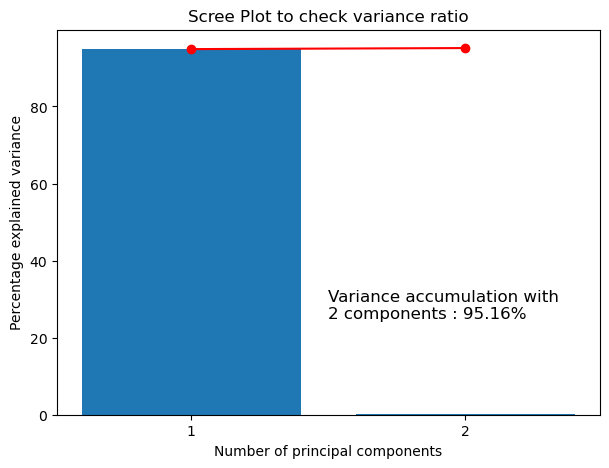

PCA(n_components=2)

In [30]:
pcaFunction(wordFastText.iloc[:,1:], 2)

"""
This code snippet calls the `pcaFunction` function defined previously to perform Principal Component Analysis (PCA) on the word embeddings data stored in the `wordFastText` DataFrame. The PCA is performed to reduce the dimensionality of the word embeddings to 2 dimensions for visualization purposes. Let's break down each part of the code and understand its functionality:

1. **Calling the `pcaFunction` function**:
   - `pcaFunction(wordFastText.iloc[:,1:], 2)`: This line calls the `pcaFunction` function with two arguments:
     - `wordFastText.iloc[:,1:]`: This selects all rows and all columns starting from the second column of the `wordFastText` DataFrame. It represents the word vectors (word embeddings) for which PCA is to be performed.
     - `2`: This specifies that PCA should reduce the dimensionality of the word embeddings to 2 dimensions.

2. **Output Explanation**:
   - The `pcaFunction` function performs PCA on the word embeddings data and generates a scree plot showing the percentage of explained variance by each principal component, along with the cumulative percentage of explained variance.
   - Since the number of principal components is set to 2 (`2` as the second argument), the PCA will reduce the dimensionality of the word embeddings to 2 dimensions.
   - The output of this line of code will be the scree plot generated by the `pcaFunction`, which visualizes the explained variance by the two principal components. Additionally, the function may return the PCA model fitted to the word embeddings data, but this is not explicitly shown or captured in the provided code snippet.

"""

In [31]:
def pcaReduction(data):
    pca = PCA(n_components=2)
    return pd.DataFrame(pca.fit_transform(data))
pcaData = pcaReduction(wordFastText.iloc[:,1:])
pcaData['words'] = model_ted.wv.index_to_key
pcaData

"""
This code snippet defines a function `pcaReduction` to perform dimensionality reduction using Principal Component Analysis (PCA) on the input data. It then applies this function to the word embeddings data stored in the `wordFastText` DataFrame, and adds the original words from the vocabulary as a new column in the resulting DataFrame `pcaData`. Let's break down each part of the code and understand its functionality:

1. **Defining the `pcaReduction` function**:
   - `def pcaReduction(data):`: Defines a function named `pcaReduction` that takes one parameter `data`, representing the input data.
   - `pca = PCA(n_components=2)`: Initializes a PCA object with `n_components` set to 2, indicating that the dimensionality should be reduced to 2 dimensions.
   - `return pd.DataFrame(pca.fit_transform(data))`: Applies PCA to the input data and returns a DataFrame containing the transformed data with reduced dimensionality.

2. **Applying PCA reduction to word embeddings data**:
   - `pcaData = pcaReduction(wordFastText.iloc[:,1:])`: Calls the `pcaReduction` function with the word embeddings data stored in the `wordFastText` DataFrame. It selects all rows and all columns starting from the second column (excluding the 'words' column) to perform PCA.

3. **Adding words to the transformed data**:
   - `pcaData['words'] = model_ted.wv.index_to_key`: Adds a new column 'words' to the `pcaData` DataFrame containing the original words from the vocabulary. These words are obtained from the `index_to_key` attribute of the word embeddings model `model_ted`.

4. **Output Explanation**:
   - The `pcaReduction` function applies PCA to the word embeddings data and returns a DataFrame `pcaData` containing the transformed data with reduced dimensionality (2 dimensions).
   - The 'words' column is added to the `pcaData` DataFrame, containing the original words from the vocabulary.
   - The output of this code will be the `pcaData` DataFrame, where each row represents a word from the vocabulary along with its corresponding 2-dimensional vector obtained after PCA transformation. The 'words' column contains the original words from the vocabulary.
   - This DataFrame can be used for visualization or further analysis to explore the relationships between words in the reduced-dimensional space.


   """

,0,1,words
0,0.009971,0.000729,willing
1,0.044933,0.001869,social
2,0.001259,-0.000284,average
3,-0.016873,0.000688,large
4,0.008118,0.001467,single
...,...,...,...
65,0.025423,0.002047,multinational
66,-0.003313,0.000041,actual
67,-0.022291,-0.001117,austrian
68,-0.022307,-0.000243,nucelear


In [32]:
from sklearn.manifold import TSNE

def tsneReduction(data):
    return pd.DataFrame(TSNE(n_components=2).fit_transform(data))

tsneData = tsneReduction(wordFastText.iloc[:,1:])

tsneData['words'] = model_ted.wv.index_to_key

tsneData

"""
This code snippet performs dimensionality reduction using t-Distributed Stochastic Neighbor Embedding (t-SNE) on the input data, which consists of word embeddings stored in the `wordFastText` DataFrame. The code then adds the original words from the vocabulary as a new column in the resulting DataFrame `tsneData`. Let's break down each part of the code and understand its functionality:

1. **Importing the necessary library**:
   - `from sklearn.manifold import TSNE`: Imports the TSNE class from the `sklearn.manifold` module, which provides functionality for t-SNE dimensionality reduction.

2. **Defining the `tsneReduction` function**:
   - `def tsneReduction(data):`: Defines a function named `tsneReduction` that takes one parameter `data`, representing the input data.
   - `return pd.DataFrame(TSNE(n_components=2).fit_transform(data))`: Applies t-SNE to the input data, reducing its dimensionality to 2 dimensions. It then returns a DataFrame containing the transformed data.

3. **Applying t-SNE reduction to word embeddings data**:
   - `tsneData = tsneReduction(wordFastText.iloc[:,1:])`: Calls the `tsneReduction` function with the word embeddings data stored in the `wordFastText` DataFrame. It selects all rows and all columns starting from the second column (excluding the 'words' column) to perform t-SNE.

4. **Adding words to the transformed data**:
   - `tsneData['words'] = model_ted.wv.index_to_key`: Adds a new column 'words' to the `tsneData` DataFrame containing the original words from the vocabulary. These words are obtained from the `index_to_key` attribute of the word embeddings model `model_ted`.

5. **Output Explanation**:
   - The `tsneReduction` function applies t-SNE to the word embeddings data and returns a DataFrame `tsneData` containing the transformed data with reduced dimensionality (2 dimensions).
   - The 'words' column is added to the `tsneData` DataFrame, containing the original words from the vocabulary.
   - The output of this code will be the `tsneData` DataFrame, where each row represents a word from the vocabulary along with its corresponding 2-dimensional vector obtained after t-SNE transformation. The 'words' column contains the original words from the vocabulary.
   - This DataFrame can be used for visualization or further analysis to explore the relationships between words in the reduced-dimensional space.

"""

,0,1,words
0,-0.284137,8.672047,willing
1,-0.271104,10.602734,social
2,-0.416412,7.630052,average
3,-0.143852,3.566576,large
4,-0.539936,8.503026,single
...,...,...,...
65,-0.308025,9.761315,multinational
66,-0.425218,6.951119,actual
67,-0.682266,2.318248,austrian
68,-0.505503,2.259669,nucelear


In [33]:
pcaDataGram = pcaReduction(FastTextGram.iloc[:,1:])
pcaDataGram['words'] = FastTextGram['words']

tsneDataGram = tsneReduction(FastTextGram.iloc[:,1:])
tsneDataGram['words'] = FastTextGram['words']


"""
This code snippet applies dimensionality reduction techniques, namely Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE), to the word embeddings data stored in the `FastTextGram` DataFrame. After reducing the dimensionality of the embeddings, the original words from the vocabulary are added as a new column to the resulting DataFrames `pcaDataGram` and `tsneDataGram`. Let's break down each part of the code and understand its functionality:

1. **Applying PCA reduction to word embeddings data**:
   - `pcaDataGram = pcaReduction(FastTextGram.iloc[:,1:])`: Calls the `pcaReduction` function with the word embeddings data stored in the `FastTextGram` DataFrame. It selects all rows and all columns starting from the second column (excluding the 'words' column) to perform PCA.
   - `pcaDataGram['words'] = FastTextGram['words']`: Adds a new column 'words' to the `pcaDataGram` DataFrame containing the original words from the vocabulary, obtained from the 'words' column of the `FastTextGram` DataFrame.

2. **Applying t-SNE reduction to word embeddings data**:
   - `tsneDataGram = tsneReduction(FastTextGram.iloc[:,1:])`: Calls the `tsneReduction` function with the word embeddings data stored in the `FastTextGram` DataFrame. It selects all rows and all columns starting from the second column (excluding the 'words' column) to perform t-SNE.
   - `tsneDataGram['words'] = FastTextGram['words']`: Adds a new column 'words' to the `tsneDataGram` DataFrame containing the original words from the vocabulary, obtained from the 'words' column of the `FastTextGram` DataFrame.

3. **Output Explanation**:
   - The `pcaDataGram` DataFrame contains the word embeddings data with reduced dimensionality using PCA, where each row represents a word from the vocabulary along with its corresponding 2-dimensional vector obtained after PCA transformation. The 'words' column contains the original words from the vocabulary.
   - The `tsneDataGram` DataFrame contains the word embeddings data with reduced dimensionality using t-SNE, where each row represents a word from the vocabulary along with its corresponding 2-dimensional vector obtained after t-SNE transformation. The 'words' column contains the original words from the vocabulary.
   - These DataFrames can be used for visualization or further analysis to explore the relationships between words in the reduced-dimensional space. The addition of the 'words' column allows for easier interpretation of the reduced-dimensional embeddings by associating each vector with its corresponding word.

"""

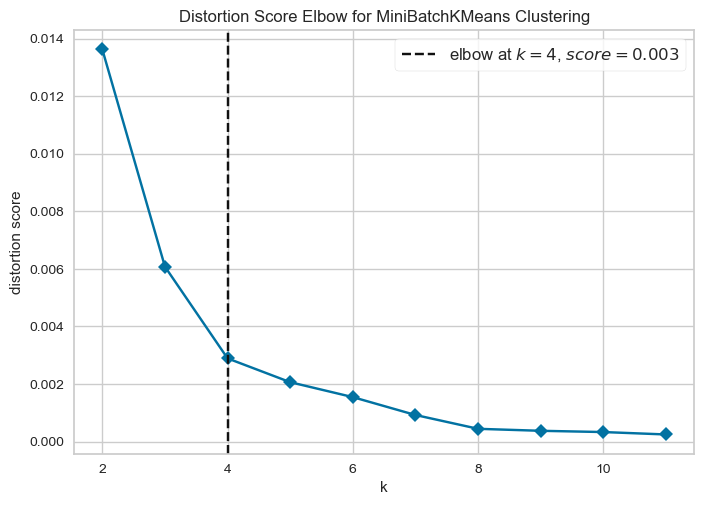

<Axes: title={'center': 'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = MiniBatchKMeans()
visualizer = KElbowVisualizer(model, k=(2,12), timings=False)

visualizer.fit(pcaData[[0,1]])        # Fit the data to the visualizer
visualizer.show()   

"""
This code performs K-means clustering on the reduced-dimensional data (`pcaData`) obtained from PCA transformation. The goal is to find the optimal number of clusters (k) using the elbow method, and visualize the results using the `KElbowVisualizer` from the Yellowbrick library.

Let's break down each part of the code and understand its functionality:

1. **Importing necessary libraries**:
   - `from sklearn.cluster import KMeans, MiniBatchKMeans`: Imports the KMeans and MiniBatchKMeans classes from the `sklearn.cluster` module, which provides implementations of the K-means clustering algorithm.
   - `from yellowbrick.cluster import KElbowVisualizer`: Imports the KElbowVisualizer class from the Yellowbrick library, which is used for visualizing the optimal number of clusters.

2. **Instantiating the clustering model and visualizer**:
   - `model = MiniBatchKMeans()`: Instantiates the MiniBatchKMeans clustering model. Mini-batch K-means is a variant of K-means that uses mini-batches to reduce computation time.
   - `visualizer = KElbowVisualizer(model, k=(2,12), timings=False)`: Instantiates the KElbowVisualizer with the MiniBatchKMeans model and specifies the range of k values to evaluate (from 2 to 12 clusters). The `timings=False` parameter is used to disable timing information for faster computation.

3. **Fitting data to the visualizer and displaying results**:
   - `visualizer.fit(pcaData[[0,1]])`: Fits the reduced-dimensional data (`pcaData`) to the visualizer. Since `pcaData` contains 2-dimensional vectors obtained after PCA transformation, we select the first two columns `[[0,1]]` for clustering.
   - `visualizer.show()`: Displays the elbow plot generated by the KElbowVisualizer, which visualizes the within-cluster sum of squares (WCSS) for different values of k. The optimal number of clusters is identified based on the "elbow" point in the plot, which represents the point of diminishing returns in terms of decreasing WCSS with increasing k.

4. **Output Explanation**:
   - The output of this code will be a visualization of the elbow plot showing the within-cluster sum of squares (WCSS) for different values of k. The optimal number of clusters is identified based on the "elbow" point in the plot, which represents the point of diminishing returns in terms of decreasing WCSS with increasing k.
   - This visualization helps in determining the appropriate number of clusters for the dataset, which can be used for further analysis or interpretation of the clustering results.

   """

In [38]:
def clustringBow(data, k):
    clusters = KMeans(n_clusters=k)
    clusters.fit(data)
    return clusters.labels_



pcaData['labels'] = clustringBow(wordFastText.iloc[:,1:], 4)
tsneData['labels'] = clustringBow(wordFastText.iloc[:,1:], 4)


pcaDataGram['labels'] = clustringBow(FastTextGram.iloc[:,1:], 4)
tsneDataGram['labels'] = clustringBow(FastTextGram.iloc[:,1:], 4)

"""
The provided code performs K-means clustering on word embeddings data obtained from different dimensionality reduction techniques: PCA and t-SNE. It assigns cluster labels to each data point based on the specified number of clusters (k=4 in this case). Let's break down each part of the code and understand its functionality:

1. **Defining the `clusteringBow` function**:
   - `def clustringBow(data, k):`: Defines a function named `clustringBow` that takes two parameters: `data`, representing the input data, and `k`, representing the number of clusters.
   - `clusters = KMeans(n_clusters=k)`: Initializes a KMeans clustering model with the specified number of clusters (`n_clusters=k`).
   - `clusters.fit(data)`: Fits the KMeans model to the input data, assigning cluster labels to each data point based on the clustering algorithm.
   - `return clusters.labels_`: Returns the cluster labels assigned by the KMeans model.

2. **Assigning cluster labels to PCA and t-SNE transformed data**:
   - `pcaData['labels'] = clustringBow(wordFastText.iloc[:,1:], 4)`: Assigns cluster labels to the PCA transformed data (`pcaData`). It calls the `clustringBow` function with the word embeddings data stored in the `wordFastText` DataFrame after excluding the first column (which represents the 'words') and specifies 4 clusters.
   - `tsneData['labels'] = clustringBow(wordFastText.iloc[:,1:], 4)`: Assigns cluster labels to the t-SNE transformed data (`tsneData`). It follows the same process as above for the t-SNE transformed data.

3. **Assigning cluster labels to PCA and t-SNE transformed data with bigram**:
   - Similar to the above steps, the code assigns cluster labels to the PCA and t-SNE transformed data (`pcaDataGram` and `tsneDataGram`) obtained after applying bigram to the word embeddings data stored in the `FastTextGram` DataFrame.

**Output Explanation**:
   - The output of this code will be four DataFrames (`pcaData`, `tsneData`, `pcaDataGram`, `tsneDataGram`) containing the transformed word embeddings data with added cluster labels.
   - Each DataFrame will have an additional column named 'labels', which contains the cluster labels assigned to each data point based on K-means clustering with 4 clusters.
   - These cluster labels can be used for further analysis or visualization to understand the grouping of similar words in the reduced-dimensional space obtained from different dimensionality reduction techniques.

   """

Text(0, 0.5, 'Component 2')

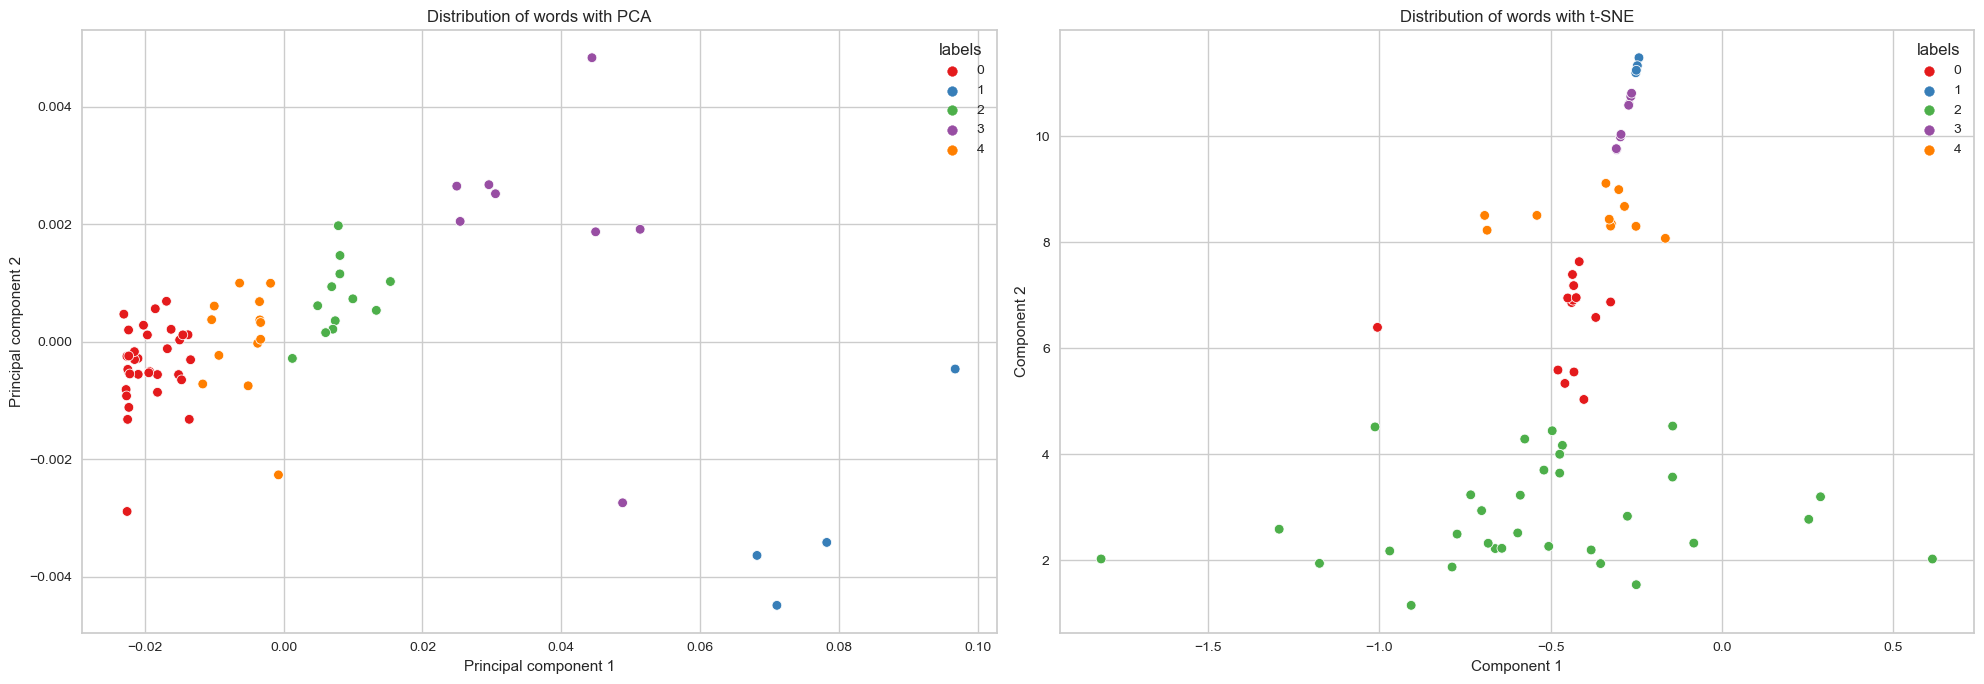

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(20,7), tight_layout=True)
sns.scatterplot(data = pcaData, x=0, y=1, hue="labels", ax=ax[0], palette='Set1')
ax[0].set_title('Distribution of words with PCA')
ax[0].set_xlabel('Principal component 1')
ax[0].set_ylabel('Principal component 2')

sns.scatterplot(data = tsneData, x=0, y=1, hue="labels", ax=ax[1], palette='Set1')
ax[1].set_title('Distribution of words with t-SNE')
ax[1].set_xlabel('Component 1')
ax[1].set_ylabel('Component 2')


"""
This code generates a side-by-side comparison of scatter plots to visualize the distribution of words in a reduced-dimensional space obtained through two different dimensionality reduction techniques: PCA (Principal Component Analysis) and t-SNE (t-Distributed Stochastic Neighbor Embedding). The scatter plots display the word embeddings with different colors representing different clusters assigned by K-means clustering. Let's break down each part of the code and understand its functionality:

1. **Creating subplots for the scatter plots**:
   - `fig, ax = plt.subplots(1, 2, figsize=(20,7), tight_layout=True)`: Creates a figure with two subplots arranged side by side (`1` row and `2` columns) using `plt.subplots()`. The size of the figure is set to `(20,7)` inches, and `tight_layout=True` ensures that the subplots are properly spaced.

2. **Plotting the scatter plot for PCA data**:
   - `sns.scatterplot(data=pcaData, x=0, y=1, hue="labels", ax=ax[0], palette='Set1')`: Creates a scatter plot for the PCA transformed data (`pcaData`) on the first subplot (`ax[0]`). The x-axis represents the first principal component (`x=0`), the y-axis represents the second principal component (`y=1`), and different clusters are distinguished by colors specified by the 'labels' column. The color palette 'Set1' is used for coloring clusters.
   - `ax[0].set_title('Distribution of words with PCA')`: Sets the title of the first subplot to 'Distribution of words with PCA'.
   - `ax[0].set_xlabel('Principal component 1')`: Sets the label for the x-axis of the first subplot.
   - `ax[0].set_ylabel('Principal component 2')`: Sets the label for the y-axis of the first subplot.

3. **Plotting the scatter plot for t-SNE data**:
   - `sns.scatterplot(data=tsneData, x=0, y=1, hue="labels", ax=ax[1], palette='Set1')`: Creates a scatter plot for the t-SNE transformed data (`tsneData`) on the second subplot (`ax[1]`). Similar to PCA, the x-axis represents the first component (`x=0`) and the y-axis represents the second component (`y=1`). Different clusters are distinguished by colors specified by the 'labels' column, and the same color palette 'Set1' is used.
   - `ax[1].set_title('Distribution of words with t-SNE')`: Sets the title of the second subplot to 'Distribution of words with t-SNE'.
   - `ax[1].set_xlabel('Component 1')`: Sets the label for the x-axis of the second subplot.
   - `ax[1].set_ylabel('Component 2')`: Sets the label for the y-axis of the second subplot.

**Output Explanation**:
- The output will be a figure with two scatter plots side by side, representing the distribution of words in the reduced-dimensional space obtained through PCA and t-SNE.
- Each point in the scatter plot represents a word, with its position determined by its respective principal components (PCA) or components (t-SNE).
- Different colors represent different clusters of words obtained from K-means clustering.
- The scatter plots provide insights into how words are grouped or clustered in the reduced-dimensional space obtained from each dimensionality reduction technique.

"""

Text(0, 0.5, 'Component 2')

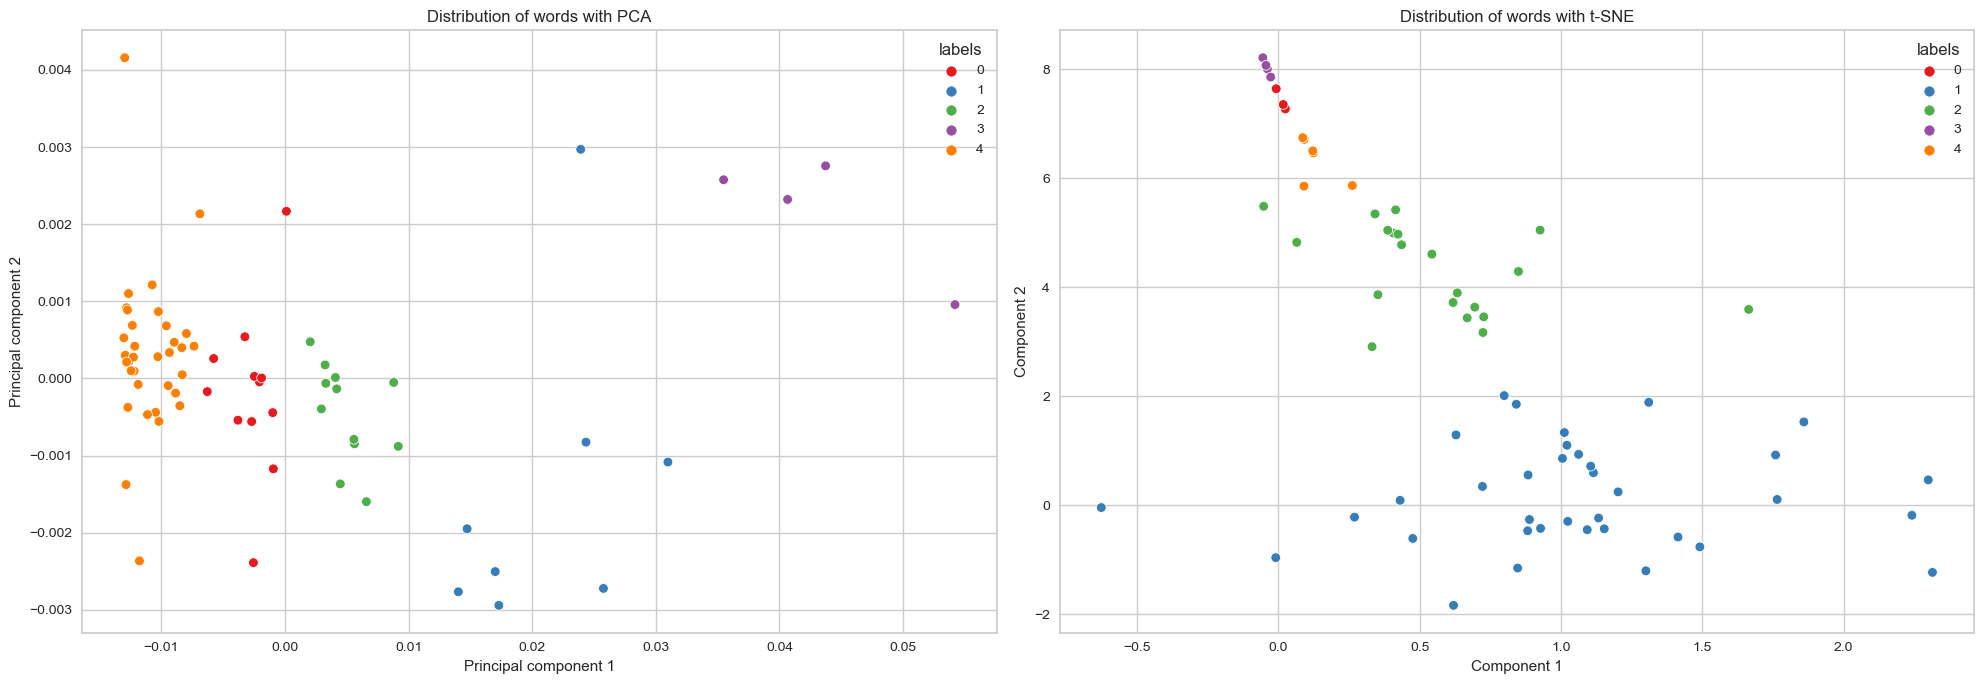

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(20,7), tight_layout=True)
sns.scatterplot(data = pcaDataGram, x=0, y=1, hue="labels", ax=ax[0], palette='Set1')
ax[0].set_title('Distribution of words with PCA')
ax[0].set_xlabel('Principal component 1')
ax[0].set_ylabel('Principal component 2')

sns.scatterplot(data = tsneDataGram, x=0, y=1, hue="labels", ax=ax[1], palette='Set1')
ax[1].set_title('Distribution of words with t-SNE')
ax[1].set_xlabel('Component 1')
ax[1].set_ylabel('Component 2')


"""
This code snippet is very similar to the previous one, but it plots the distribution of words in a reduced-dimensional space obtained from PCA and t-SNE after applying bigram to the word embeddings data. Let's break down each part of the code and understand its functionality:

1. **Creating subplots for the scatter plots**:
   - `fig, ax = plt.subplots(1, 2, figsize=(20,7), tight_layout=True)`: Creates a figure with two subplots arranged side by side (`1` row and `2` columns) using `plt.subplots()`. The size of the figure is set to `(20,7)` inches, and `tight_layout=True` ensures that the subplots are properly spaced.

2. **Plotting the scatter plot for PCA data with bigram**:
   - `sns.scatterplot(data=pcaDataGram, x=0, y=1, hue="labels", ax=ax[0], palette='Set1')`: Creates a scatter plot for the PCA transformed data with bigram (`pcaDataGram`) on the first subplot (`ax[0]`). The x-axis represents the first principal component (`x=0`), the y-axis represents the second principal component (`y=1`), and different clusters are distinguished by colors specified by the 'labels' column. The color palette 'Set1' is used for coloring clusters.
   - `ax[0].set_title('Distribution of words with PCA')`: Sets the title of the first subplot to 'Distribution of words with PCA'.
   - `ax[0].set_xlabel('Principal component 1')`: Sets the label for the x-axis of the first subplot.
   - `ax[0].set_ylabel('Principal component 2')`: Sets the label for the y-axis of the first subplot.

3. **Plotting the scatter plot for t-SNE data with bigram**:
   - `sns.scatterplot(data=tsneDataGram, x=0, y=1, hue="labels", ax=ax[1], palette='Set1')`: Creates a scatter plot for the t-SNE transformed data with bigram (`tsneDataGram`) on the second subplot (`ax[1]`). Similar to PCA, the x-axis represents the first component (`x=0`) and the y-axis represents the second component (`y=1`). Different clusters are distinguished by colors specified by the 'labels' column, and the same color palette 'Set1' is used.
   - `ax[1].set_title('Distribution of words with t-SNE')`: Sets the title of the second subplot to 'Distribution of words with t-SNE'.
   - `ax[1].set_xlabel('Component 1')`: Sets the label for the x-axis of the second subplot.
   - `ax[1].set_ylabel('Component 2')`: Sets the label for the y-axis of the second subplot.

**Output Explanation**:
- The output will be a figure with two scatter plots side by side, representing the distribution of words in the reduced-dimensional space obtained through PCA and t-SNE after applying bigram to the word embeddings data.
- Each point in the scatter plot represents a word, with its position determined by its respective principal components (PCA) or components (t-SNE).
- Different colors represent different clusters of words obtained from K-means clustering.
- The scatter plots provide insights into how words are grouped or clustered in the reduced-dimensional space obtained from each dimensionality reduction technique after incorporating bigram information.

"""

Text(0.5, 1.0, 'Number of words in each cluster for Bi/trigram')

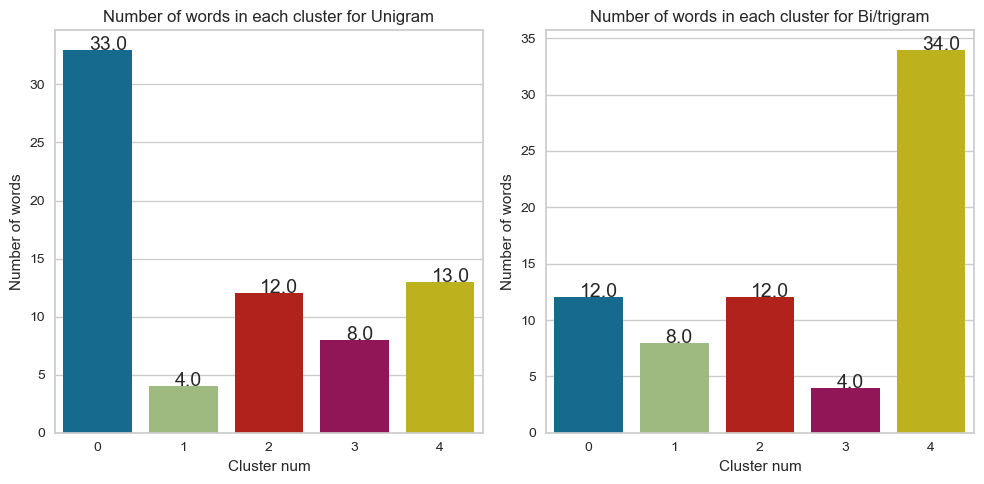

In [43]:
fig= plt.figure(figsize=(10,5), tight_layout=True)

plt.subplot(1, 2, 1)
countUnigram = sns.countplot(data=pcaData, x='labels')
for p in countUnigram.patches:
    txt = str(p.get_height())
    txt_x = p.get_x() + 0.3
    txt_y = p.get_height()
    countUnigram.text(txt_x,txt_y,txt, size=14)
plt.ylabel('Number of words')
plt.xlabel('Cluster num')
plt.title('Number of words in each cluster for Unigram')  

plt.subplot(1, 2, 2)
countUnigram = sns.countplot(data=pcaDataGram, x='labels')
for p in countUnigram.patches:
    txt = str(p.get_height())
    txt_x = p.get_x() + 0.3
    txt_y = p.get_height()
    countUnigram.text(txt_x,txt_y,txt, size=14)
plt.ylabel('Number of words')
plt.xlabel('Cluster num')
plt.title('Number of words in each cluster for Bi/trigram') 

"""
This code generates a side-by-side comparison of bar plots to visualize the number of words in each cluster obtained from K-means clustering for both unigram and bigram/trigram data. Let's break down each part of the code and understand its functionality:

1. **Creating the figure and subplots**:
   - `fig = plt.figure(figsize=(10,5), tight_layout=True)`: Creates a new figure with a specified size of `(10,5)` inches and ensures tight layout.
   - `plt.subplot(1, 2, 1)`: Creates the first subplot in a 1x2 grid of subplots. This subplot will be on the left side.
   - `plt.subplot(1, 2, 2)`: Creates the second subplot in a 1x2 grid of subplots. This subplot will be on the right side.

2. **Plotting the bar plot for unigram data**:
   - `countUnigram = sns.countplot(data=pcaData, x='labels')`: Creates a count plot for the unigram data (`pcaData`) on the first subplot. The x-axis represents the cluster number, and the height of each bar represents the number of words in that cluster.
   - `for p in countUnigram.patches:`: Iterates over each bar in the plot.
   - `txt = str(p.get_height())`: Retrieves the height of the bar as a string.
   - `txt_x = p.get_x() + 0.3`: Calculates the x-coordinate for placing the text label.
   - `txt_y = p.get_height()`: Retrieves the height of the bar to determine the y-coordinate for placing the text label.
   - `countUnigram.text(txt_x, txt_y, txt, size=14)`: Adds a text label to each bar indicating the number of words in that cluster.
   - Sets labels and title for the plot.

3. **Plotting the bar plot for bigram/trigram data**:
   - Similar to the previous subplot, this code block creates a count plot for the bigram/trigram data (`pcaDataGram`) on the second subplot.
   - It also iterates over each bar, retrieves the height, and adds text labels to indicate the number of words in each cluster.
   - Sets labels and title for the plot.

**Output Explanation**:
- The output will be a figure with two bar plots side by side, representing the number of words in each cluster obtained from K-means clustering for unigram and bigram/trigram data.
- Each bar in the plot corresponds to a cluster, and the height of the bar indicates the number of words in that cluster.
- Text labels are added to each bar to display the exact count of words in each cluster.
- These bar plots provide insights into the distribution of words among clusters for both unigram and bigram/trigram data, allowing for comparison between the two.

"""

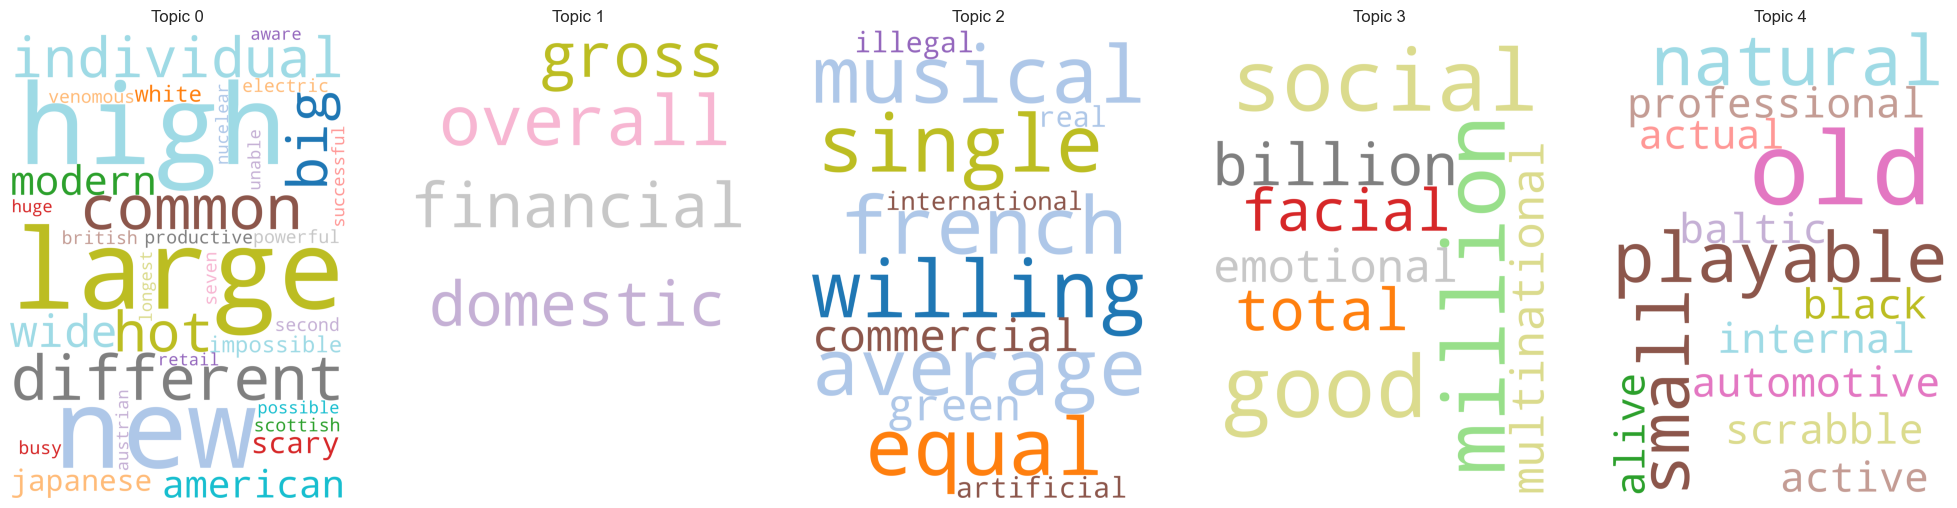

In [44]:
fig, axes = plt.subplots(1,4, figsize=(25,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    cloudClusterWords = " ".join(cat for cat in pcaData[pcaData['labels']==i]['words'])
    plt.gca().imshow(WordCloud(collocations = False, background_color = 'white', width=5000 ,height=7000, colormap='tab20').generate(cloudClusterWords))
    plt.gca().set_title('Topic ' + str(i))
    plt.gca().axis('off')


    """
    This code generates a set of word cloud visualizations to represent the words associated with each cluster obtained from K-means clustering using PCA transformed data. Let's break down each part of the code and understand its functionality:

1. **Creating the figure and subplots**:
   - `fig, axes = plt.subplots(1, 5, figsize=(25,10), sharex=True, sharey=True)`: Creates a figure with 1 row and 5 columns of subplots, each sharing the same x and y axes. The size of the figure is `(25, 10)` inches.

2. **Iterating over subplots and generating word clouds**:
   - `for i, ax in enumerate(axes.flatten()):`: Iterates over each subplot and its corresponding axis.
   - `fig.add_subplot(ax)`: Adds a subplot to the figure.
   - `cloudClusterWords = " ".join(cat for cat in pcaData[pcaData['labels']==i]['words'])`: Concatenates all words associated with the current cluster (`i`) into a single string.
   - `plt.gca().imshow(WordCloud(collocations=False, background_color='white', width=5000, height=7000, colormap='tab20').generate(cloudClusterWords))`: Generates a word cloud visualization for the concatenated words of the current cluster using the `WordCloud` module. It specifies parameters like background color, width, height, and colormap.
   - `plt.gca().set_title('Topic ' + str(i))`: Sets the title of the current subplot to 'Topic ' followed by the cluster number (`i`).
   - `plt.gca().axis('off')`: Turns off the axis for the current subplot.

**Output Explanation**:
- The output will be a figure containing 5 subplots arranged horizontally, each representing a different cluster.
- Each subplot will display a word cloud visualization where the size of each word corresponds to its frequency in the concatenated words associated with the cluster.
- The title of each subplot indicates the cluster number.
- Word clouds provide a visual representation of the most common words within each cluster, helping to identify patterns or themes associated with the clusters.

"""

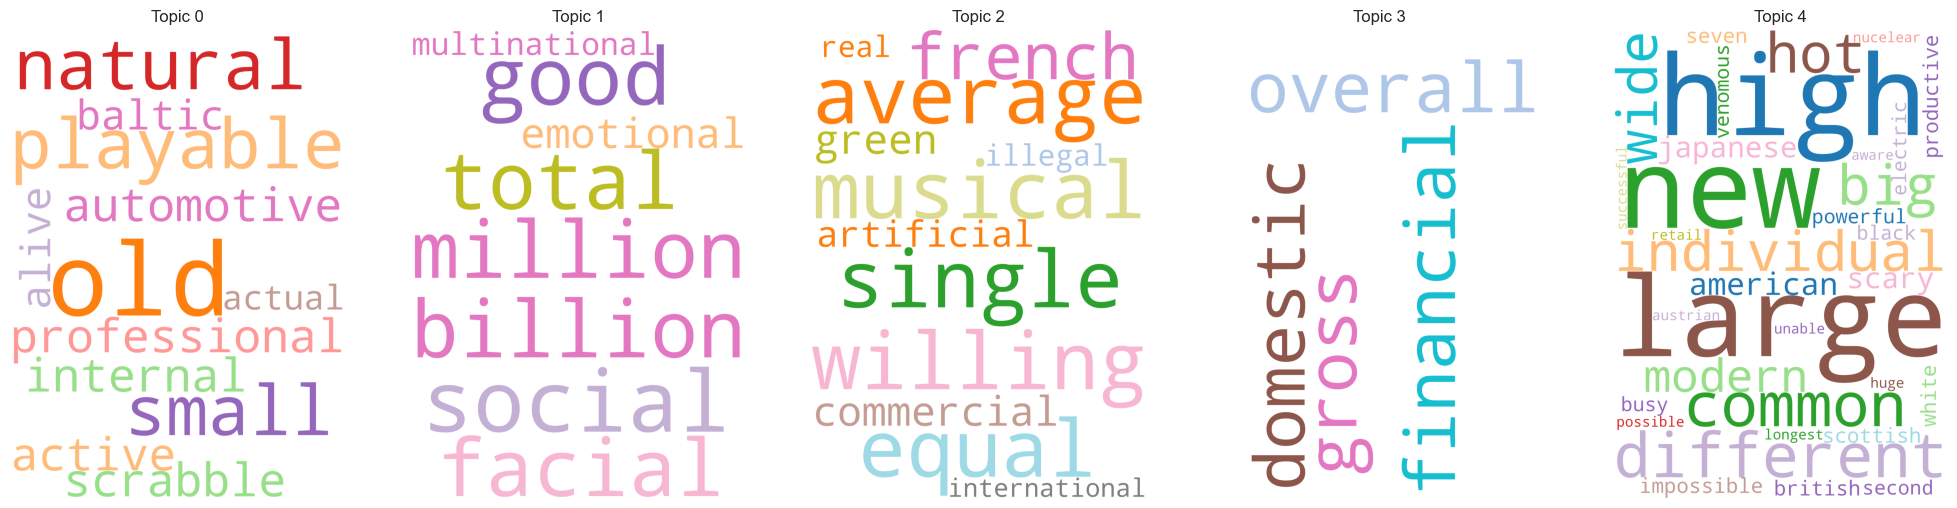

In [45]:
fig, axes = plt.subplots(1,4, figsize=(25,10), sharex=True, sharey=True)


for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    cloudClusterWords = " ".join(cat for cat in pcaDataGram[pcaDataGram['labels']==i]['words'])
    plt.gca().imshow(WordCloud(collocations = False, background_color = 'white', width=5000 ,height=7000, colormap='tab20').generate(cloudClusterWords))
    plt.gca().set_title('Topic ' + str(i))
    plt.gca().axis('off')


1. **Word Cloud Analysis**:
   - The word cloud visualizations generated from the text column provide insights into the most frequent words present in the dataset.
   - By clustering the words into different groups using K-means clustering and visualizing them with word clouds, we can identify clusters of words that frequently co-occur together.
   - These clusters can represent themes or topics present in the TikTok dataset's text column, allowing us to understand the content distribution and prevalent topics.

2. **Dimensionality Reduction Techniques**:
   - Dimensionality reduction techniques such as PCA and t-SNE are applied to the word embeddings derived from the text column.
   - These techniques help visualize the high-dimensional word embeddings in lower-dimensional spaces, facilitating the exploration of word similarities and clusters.

3. **Cluster Analysis**:
   - K-means clustering is performed on the word embeddings obtained from PCA and t-SNE transformations.
   - The optimal number of clusters is determined using techniques like the elbow method, providing insights into the natural grouping of words in the dataset.
   - The clusters can represent different themes or categories present in the TikTok dataset's text column.

4. **Insights from Visualizations**:
   - Scatter plots and bar plots are used to visualize the distribution of words and the number of words in each cluster, respectively.
   - These visualizations help in understanding the grouping of words, the distribution of clusters, and the relative sizes of different clusters.
   - Word cloud visualizations further enhance our understanding of the content distribution within each cluster, highlighting the most common words associated with specific topics or themes.

5. **Text Processing and Analysis**:
   - Text preprocessing techniques such as removing punctuation, stopwords, and lemmatization are applied to the text column.
   - These techniques help clean and normalize the text data, making it suitable for further analysis and modeling.

6. **Insights into TikTok Content**:
   - By analyzing the content distribution, word clusters, and prevalent themes/topics in the TikTok dataset's text column, we can gain insights into the types of content, trends, and discussions occurring on the platform.
   - These insights can inform content creators, marketers, and researchers about the preferences, interests, and behaviors of TikTok users, aiding in content creation, campaign targeting, and trend analysis.